In [1]:
from dask.distributed import Client, progress
client = Client(threads_per_worker=4, n_workers=1)
client

/Users/pantelistzamalis/opt/anaconda3/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 57138 instead
  http_address["port"], self.http_server.port


Client Scheduler: tcp://127.0.0.1:57139 Dashboard: http://127.0.0.1:57138/status,Cluster Workers: 1 Cores: 4 Memory: 17.18 GB


In [2]:
import time
import random

In [3]:
def inc(x):
    time.sleep(random.random())
    return x + 1

In [4]:
def dec(x):
    time.sleep(random.random())
    return x - 1

In [5]:
def add(x, y):
    time.sleep(random.random())
    return x + y

In [6]:
%%time
x = inc(1)
y = dec(2)
z = add(x, y)
z

CPU times: user 36.1 ms, sys: 8 ms, total: 44.1 ms
Wall time: 1.58 s


3

In [7]:
import dask

In [8]:
inc = dask.delayed(inc)
dec = dask.delayed(dec)
add = dask.delayed(add)

In [9]:
x = inc(1)
y = dec(2)
z = add(x, y)
z

Delayed('add-505c13b0-8059-4141-a377-494ec5910fab')

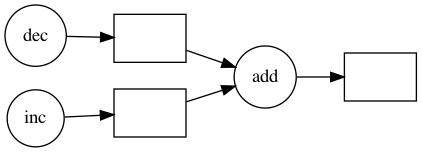

In [10]:
z.visualize(rankdir='LR')

In [11]:
z.compute()

3

## Parallelize Normal Python code

In [12]:
zs = []

In [13]:
%%time
for i in range(256):
    x = inc(i)
    y = dec(x)
    z = add(x, y)
    zs.append(z)

CPU times: user 25 ms, sys: 3.65 ms, total: 28.6 ms
Wall time: 27.6 ms


In [14]:
zs = dask.persist(*zs)  # trigger computation in the background

In [15]:
client.cluster.scale(10)  # ask for ten 4-thread workers

## Custom computation: Tree summation

In [16]:
L = zs
while len(L) > 1:
    new_L = []
    for i in range(0, len(L), 2):
        lazy = add(L[i], L[i + 1])  # add neighbors
        new_L.append(lazy)
    L = new_L    

In [17]:
dask.compute(L)

([65536],)